# The Impact of covid 19 on mental health due the global economic crisis
##### Description
Data for 170 countries in respect to the impact of covid-19 on the global economy

In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import wordcloud
from wordcloud import WordCloud,STOPWORDS
import seaborn as sns
import matplotlib.dates as md
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.utils import shuffle

In [2]:
data = pd.read_csv('transformed_data.csv')
data

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
1,AFG,Afghanistan,2020-01-01,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
2,AFG,Afghanistan,2020-01-02,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
3,AFG,Afghanistan,2020-01-03,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
4,AFG,Afghanistan,2020-01-04,0.498,0.000000,0.000000,0.000000,17.477233,7.497754
...,...,...,...,...,...,...,...,...,...
50413,ZWE,Zimbabwe,2020-10-15,0.535,8.994048,5.442418,4.341855,16.514381,7.549491
50414,ZWE,Zimbabwe,2020-10-16,0.535,8.996528,5.442418,4.341855,16.514381,7.549491
50415,ZWE,Zimbabwe,2020-10-17,0.535,8.999496,5.442418,4.341855,16.514381,7.549491
50416,ZWE,Zimbabwe,2020-10-18,0.535,9.000853,5.442418,4.341855,16.514381,7.549491


In [3]:
# convert Date column to date type
data["DATE"] = pd.to_datetime(data["DATE"], format = '%Y-%m-%d')
data = data.replace([np.inf, -np.inf], np.nan)
data = data.fillna(data.mean())
data.head()

<ipython-input-3-79847e1c351d>:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data = data.fillna(data.mean())


,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
0,AFG,Afghanistan,2019-12-31,0.498,0.0,0.0,0.0,17.477233,7.497754
1,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477233,7.497754
2,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477233,7.497754
3,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477233,7.497754
4,AFG,Afghanistan,2020-01-04,0.498,0.0,0.0,0.0,17.477233,7.497754


### Human Development Index:

The HDI was created to emphasize that people and their capabilities should be the ultimate criteria for assessing the development of a country, not economic growth alone. The HDI can also be used to question national policy choices, asking how two countries with the same level of GNI per capita can end up with different human development outcomes. These contrasts can stimulate debate about government policy priorities. The Human Development Index (HDI) is a summary measure of average achievement in key dimensions of human development: a long and healthy life, being knowledgeable and have a decent standard of living. The HDI is the geometric mean of normalized indices for each of the three dimensions.

The health dimension is assessed by life expectancy at birth, the education dimension is measured by mean of years of schooling for adults aged 25 years and more and expected years of schooling for children of school entering age. The standard of living dimension is measured by gross national income per capita. The HDI uses the logarithm of income, to reflect the diminishing importance of income with increasing GNI. The scores for the three HDI dimension indices are then aggregated into a composite index using geometric mean. Refer to Technical notes for more details.

The HDI simplifies and captures only part of what human development entails. It does not reflect on inequalities, poverty, human security, empowerment, etc. The HDRO offers the other composite indices as broader proxy on some of the key issues of human development, inequality, gender disparity and poverty.

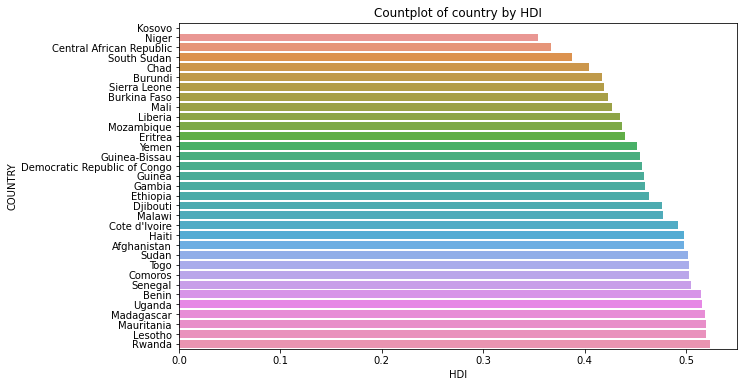

In [4]:
hdi = data.sort_values(by='HDI', ascending=True)[:7000]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=hdi.COUNTRY, x=hdi.HDI)
plt.xticks()
plt.xlabel('HDI')
plt.ylabel('COUNTRY')
plt.title('Countplot of country by HDI')
plt.show()

### Stringency Index ?
It is among the metrics being used by the Oxford COVID-19 Government Response Tracker.
The Tracker involves a team of 100 Oxford community members who have continuously updated a database of 17 indicators of government response.
These indicators examine containment policies such as school and workplace closings, public events, public transport, stay-at-home policies.
The Stringency Index is a number from 0 to 100 that reflects these indicators. A higher index score indicates a higher level of stringency.

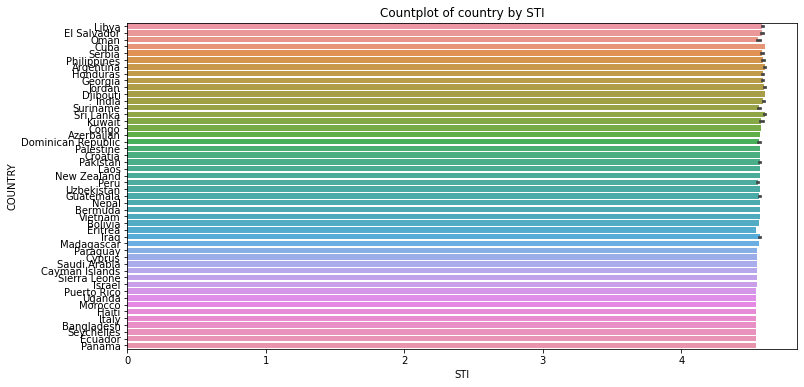

In [5]:
sti = data.sort_values(by='STI', ascending=False)[:2000]
figure = plt.figure(figsize=(12,6))
sns.barplot(y=sti.COUNTRY, x=sti.STI)
plt.xticks()
plt.xlabel('STI')
plt.ylabel('COUNTRY')
plt.title('Countplot of country by STI')
plt.show()

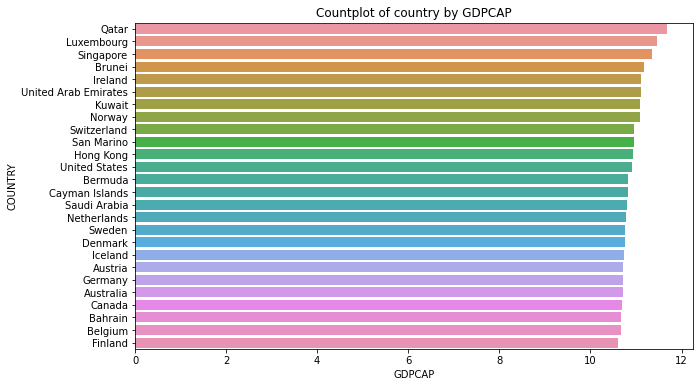

In [6]:
gdp = data.sort_values(by='GDPCAP', ascending=False)[:7000]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=gdp.COUNTRY, x=gdp.GDPCAP)
plt.xticks()
plt.xlabel('GDPCAP')
plt.ylabel('COUNTRY')
plt.title('Countplot of country by GDPCAP')
plt.show()

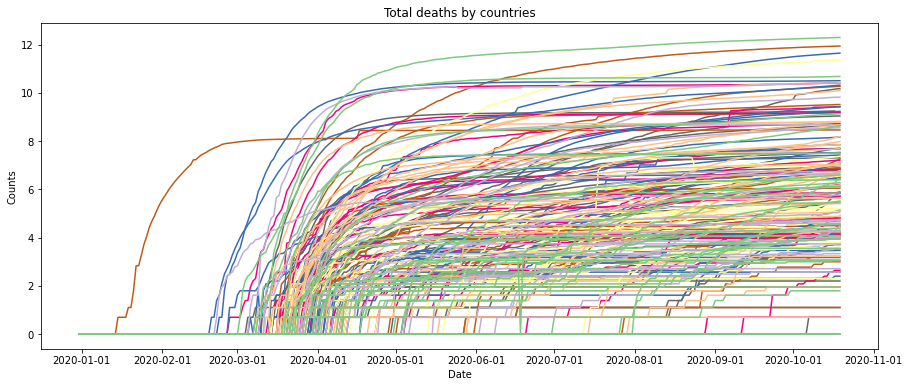

In [7]:
#Inspired by this notebook : https://www.kaggle.com/gergelycsords/impact-of-covid-19-pandemic-some-visualization
fig1, ax = plt.subplots(figsize = (15, 6))

sns.lineplot(data=data, x='DATE', y='TD', hue='COUNTRY', legend=False, palette='Accent_r')

ax.set_title("Total deaths by countries")
ax.set_xlabel("Date")
ax.set_ylabel("Counts")

ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))

### Total Deaths

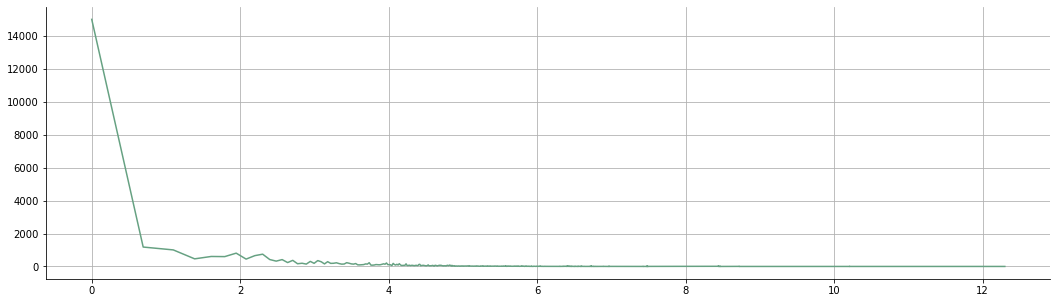

In [8]:
built_TD = data['TD'].value_counts().sort_index()
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

ax.plot(built_TD.index, built_TD, color='#66a182')

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

ax.grid()

plt.show()

### Total Cases

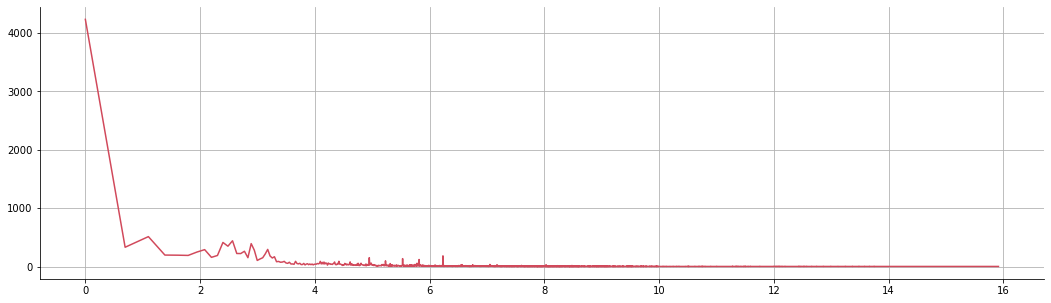

In [9]:
built_TC = data['TC'].value_counts().sort_index()
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

ax.plot(built_TC.index, built_TC, color='#d1495b')

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

ax.grid()

plt.show()

### Function For Impact

In [10]:
def impact(x):
    y = data[['CODE','COUNTRY','DATE','HDI','TC','TD','STI','POP','GDPCAP']][data["COUNTRY"] == x]
    y = y.sort_values(by="CODE",ascending=False)
    return y.head(15)
impact("India").tail()

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
21620,IND,India,2020-07-10,0.64,13.584589,9.980634,4.353884,21.045353,8.768212
21619,IND,India,2020-07-09,0.64,13.550628,9.958402,4.305011,21.045353,8.768212
21618,IND,India,2020-07-08,0.64,13.517666,9.935083,4.305011,21.045353,8.768212
21617,IND,India,2020-07-07,0.64,13.486541,9.911456,4.305011,21.045353,8.768212
21616,IND,India,2020-07-06,0.64,13.455133,9.888019,4.305011,21.045353,8.768212


### Feature Engineering

### Handling outliers

#### Methods for handling outliers

Now that we understand how to detect outliers in a better way, it’s time to engineer them. We’re going to explore a few different techniques and methods to achieve that:

##### 1.Trimming: Simply removing the outliers from our dataset.
##### 2.Imputing: We treat outliers as missing data, and we apply missing data imputation techniques.
##### 3.Discretization: We place outliers in edge bins with higher or lower values of the distribution.
##### 4.Censoring: Capping the variable distribution at the maximum and minimum values.

In [11]:
# Imputing

def detect_outlier(data):
        outliers = []
        threshold = -2
        mean = np.mean(data)
        std = np.std(data)
        for y in data:
            z_score = (y - mean) / std
            if z_score < threshold:
                outliers.append(y)
        return outliers

result = list(set(detect_outlier(data["POP"])))
print(f'Outlier: {result}')

Outlier: [6.695798917, 8.15564927, 9.615938805, 10.1743159, 10.31682162, 10.42498602, 8.516993171000001, 10.43229061]


In [12]:
data_impute = data
data_impute["POP"] = data_impute["POP"].apply(lambda x : data_impute["POP"].mean() if x in result else x)

##### 3. Binning
Binning can be applied on both categorical and numerical data.

The main motivation of binning is to make the model more robust and prevent overfitting. However, it has a cost on the performance. Every time you bin something, you sacrifice information and make your data more regularized.

In [13]:
data_binning = data.copy(deep = True)

data_binning["TD"].value_counts()

0.000000    15017
0.693147     1180
1.098612     1006
1.945910      809
2.302585      746
            ...  
8.729397        1
8.423322        1
9.873441        1
8.769818        1
9.231906        1
Name: TD, Length: 6373, dtype: int64

In [14]:
data_binning["TD"] = pd.cut(data_binning["TD"], bins = 5, labels = ["Bin_1", "Bin_2", "Bin_3", "Bin_4", "Bin_5"])
data_binning.sample(5)

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP
13643,DOM,Dominican Republic,2020-09-14,0.736000,11.548872,Bin_4,4.329812,16.199482,9.588836
46449,TUN,Tunisia,2020-03-16,0.735000,2.890372,Bin_1,3.660737,16.285187,9.291856
13298,DMA,Dominica,2020-07-25,0.715000,2.890372,Bin_1,3.794140,11.184296,9.177132
3932,BGD,Bangladesh,2020-06-17,0.608000,11.456154,Bin_3,4.311336,18.919572,8.167347
39470,SMR,San Marino,2020-09-18,0.720139,6.583409,Bin_2,3.388787,15.442097,10.948373


#### 4. Log Transformation
Logarithm transformation (or log transform) is one of the most commonly used mathematical transformations in feature engineering. Here are the benefits of using log transform:

It helps to handle skewed data and after transformation, the distribution becomes more approximate to normal
It also decreases the effect of the outliers due to the normalization of magnitude differences and the model become more robust
The data you apply log transform to must have only positive values, otherwise you receive an error

In [15]:
data_log = data.copy(deep = True)
data_log["GDPCAP"] = data_log["GDPCAP"].apply(lambda x : x * 10000)
data_log["GDPCAP"]

0        74977.54494
1        74977.54494
2        74977.54494
3        74977.54494
4        74977.54494
            ...     
50413    75494.90737
50414    75494.90737
50415    75494.90737
50416    75494.90737
50417    75494.90737
Name: GDPCAP, Length: 50418, dtype: float64

In [16]:
np.log1p(data["GDPCAP"])

0        2.139802
1        2.139802
2        2.139802
3        2.139802
4        2.139802
           ...   
50413    2.145872
50414    2.145872
50415    2.145872
50416    2.145872
50417    2.145872
Name: GDPCAP, Length: 50418, dtype: float64

#### 5.Encoding
Encoding is one of the most common encoding methods in machine learning. This method spreads the values in a column to multiple flag columns and assigns 0 or 1 to them. These binary values express the relationship between grouped and encoded column.

This method changes your categorical data, which is challenging to understand for algorithms, to a numerical format and enables you to group your categorical data without losing any information.

In [17]:
data_encode = data.copy(deep = True)

data_encode["COUNTRY"].value_counts()

Germany            294
Armenia            294
Kuwait             294
Bahrain            294
Pakistan           294
                  ... 
Tajikistan         172
Comoros            171
Lesotho            158
Hong Kong           51
Solomon Islands      4
Name: COUNTRY, Length: 210, dtype: int64

In [18]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

res = ohe.fit_transform(data_encode["COUNTRY"].values.reshape(-1,1))

res.toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [19]:
ohe.inverse_transform(res)

array([['Afghanistan'],
       ['Afghanistan'],
       ['Afghanistan'],
       ...,
       ['Zimbabwe'],
       ['Zimbabwe'],
       ['Zimbabwe']], dtype=object)

In [20]:
y = pd.get_dummies(data_encode["COUNTRY"], prefix='Country')
y.head()

,Country_Afghanistan,Country_Albania,Country_Algeria,Country_Andorra,Country_Angola,Country_Anguilla,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Aruba,...,Country_United States,Country_United States Virgin Islands,Country_Uruguay,Country_Uzbekistan,Country_Vatican,Country_Venezuela,Country_Vietnam,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
#label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

print(le.fit_transform(data_encode["COUNTRY"]))

[  0   0   0 ... 209 209 209]


#### 6. Grouping
Categorical Grouping
Using a pivot table or grouping based on aggregate functions using lambda.

Numeric Grouping
Numerical columns are grouped using sum and mean functions in most of the cases.

In [22]:
data_group = data.copy(deep = True)

In [23]:
data.pivot(index = 'DATE', columns = 'CODE').head()

COUNTRY                                                         \
CODE           ABW          AFG  AGO  AIA  ALB  AND                   ARE   
DATE                                                                        
2019-12-31     NaN  Afghanistan  NaN  NaN  NaN  NaN  United Arab Emirates   
2020-01-01     NaN  Afghanistan  NaN  NaN  NaN  NaN  United Arab Emirates   
2020-01-02     NaN  Afghanistan  NaN  NaN  NaN  NaN  United Arab Emirates   
2020-01-03     NaN  Afghanistan  NaN  NaN  NaN  NaN  United Arab Emirates   
2020-01-04     NaN  Afghanistan  NaN  NaN  NaN  NaN  United Arab Emirates   

                               ... GDPCAP                                    \
CODE        ARG      ARM  ATG  ...    VAT VCT VEN VGB VIR       VNM YEM ZAF   
DATE                           ...                                            
2019-12-31  NaN  Armenia  NaN  ...    NaN NaN NaN NaN NaN  8.727759 NaN NaN   
2020-01-01  NaN  Armenia  NaN  ...    NaN NaN NaN NaN NaN  8.727759 NaN NaN   
2020-01-02  NaN  Armenia  NaN  ...    NaN NaN NaN NaN NaN  8.727759 NaN NaN   
2020-01-03  NaN  Armenia  NaN  ...    NaN NaN NaN NaN NaN  8.727759 NaN NaN   
2020-01-04  NaN  Armenia  NaN  ...    NaN NaN NaN NaN NaN  8.727759 NaN NaN   

                    
CODE       ZMB ZWE  
DATE                
2019-12-31 NaN NaN  
2020-01-01 NaN NaN  
2020-01-02 NaN NaN  
2020-01-03 NaN NaN  
2020-01-04 NaN NaN  

[5 rows x 1470 columns]

In [24]:
pd.DataFrame(data_group.groupby("COUNTRY")[["HDI", "TC", "TD"]].mean()).reset_index()

,COUNTRY,HDI,TC,TD
0,Afghanistan,0.498,6.804919,4.173293
1,Albania,0.785,7.565514,4.130528
2,Algeria,0.754,6.981329,4.783049
3,Andorra,0.858,6.485966,3.480775
4,Angola,0.581,5.679145,2.783673
...,...,...,...,...
205,Venezuela,0.761,8.268582,3.895227
206,Vietnam,0.694,4.933531,0.889582
207,Yemen,0.452,6.027499,4.808522
208,Zambia,0.588,7.165626,3.383976


#### 7. Scaling¶
In most cases, the numerical features of the dataset do not have a certain range and they differ from each other. In order for a symmetric dataset, scaling is required.

Normalization
Normalization (or min-max normalization) scales all values in a fixed range between 0 and 1. This transformation does not change the distribution of the feature and due to the decreased standard deviations, the effects of the outliers increases. Therefore, before normalization, it is recommended to handle the outliers

Standardization
Standardization (or z-score normalization) scales the values while taking into account standard deviation. If the standard deviation of features is different, their range also would differ from each other. This reduces the effect of the outliers in the features.

In [25]:
# Min max scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

y = scaler.fit_transform(data["HDI"].values.reshape(-1, 1))

pd.DataFrame({"HDI": data["HDI"], "Normalized HDI": y.flatten()})

,HDI,Normalized HDI
0,0.498,0.522560
1,0.498,0.522560
2,0.498,0.522560
3,0.498,0.522560
4,0.498,0.522560
...,...,...
50413,0.535,0.561385
50414,0.535,0.561385
50415,0.535,0.561385
50416,0.535,0.561385


In [26]:
# Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

y = scaler.fit_transform(data["HDI"].values.reshape(-1, 1))

pd.DataFrame({"HDI": data["HDI"], "Standardized HDI": y.flatten()})

,HDI,Standardized HDI
0,0.498,-1.474252
1,0.498,-1.474252
2,0.498,-1.474252
3,0.498,-1.474252
4,0.498,-1.474252
...,...,...
50413,0.535,-1.228696
50414,0.535,-1.228696
50415,0.535,-1.228696
50416,0.535,-1.228696


### Machine Learning Modelling

In [56]:
#LINEAR REGRESSION
y = data['GDPCAP']
x = data[['TC','TD','STI','HDI','POP']]

In [57]:
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.2)
train = x_train.join(y_train)
corr_mat = train.corr()

In [58]:
corr_mat['GDPCAP'].sort_values(ascending = False)

GDPCAP    1.000000
POP       0.314625
TD        0.300196
HDI       0.291973
STI       0.258759
TC        0.256101
Name: GDPCAP, dtype: float64

<AxesSubplot:>

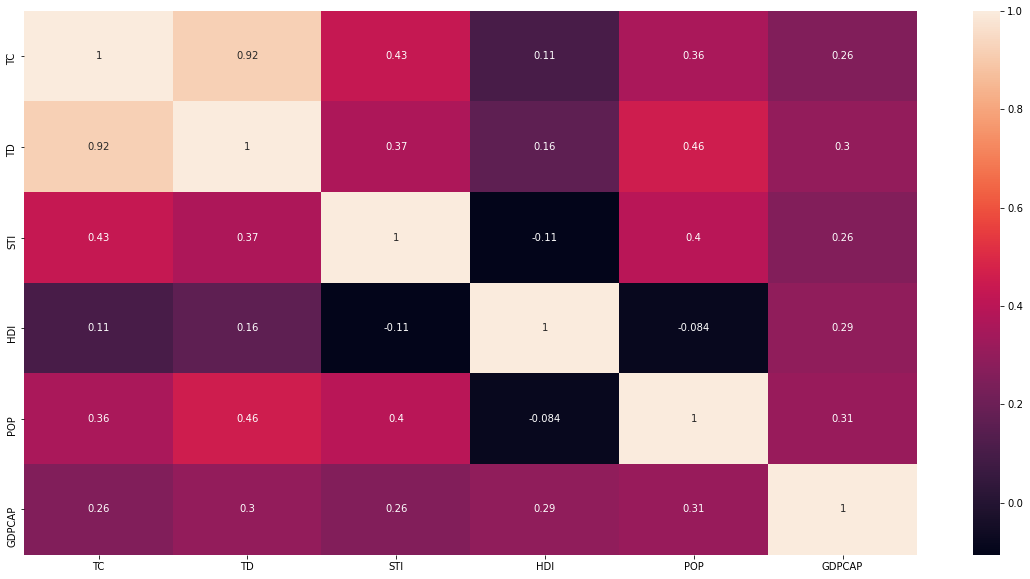

In [59]:
fig = plt.subplots(figsize = (20,10))
sns.heatmap(train.corr(), annot = True)

In [60]:
linear_regression = LinearRegression()
linear_regression.fit(x,y)

LinearRegression()

In [61]:
y_pred = linear_regression.predict(x)
y_pred

array([6.25871871, 6.25871871, 6.25871871, ..., 7.93483789, 7.9347768 ,
       7.9345719 ])

In [62]:
acc = linear_regression.score(x_test, y_test)
acc_percentage = acc*100
acc_percentage

22.52626266921184

In [63]:
mhdata = pd.read_csv('worldwide_happiness_report.csv')

In [70]:
mhdata.head() 

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [115]:
#LINEAR REGRESSION
y = mhdata['Score']
x = mhdata[['GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Perceptions of corruption']]

In [116]:
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.2)
train = x_train.join(y_train)
corr_mat = train.corr()
corr_mat['GDP per capita'].sort_values(ascending = False)

GDP per capita                  1.000000
Healthy life expectancy         0.823801
Score                           0.773787
Social support                  0.749861
Freedom to make life choices    0.362366
Perceptions of corruption       0.270206
Name: GDP per capita, dtype: float64

<AxesSubplot:>

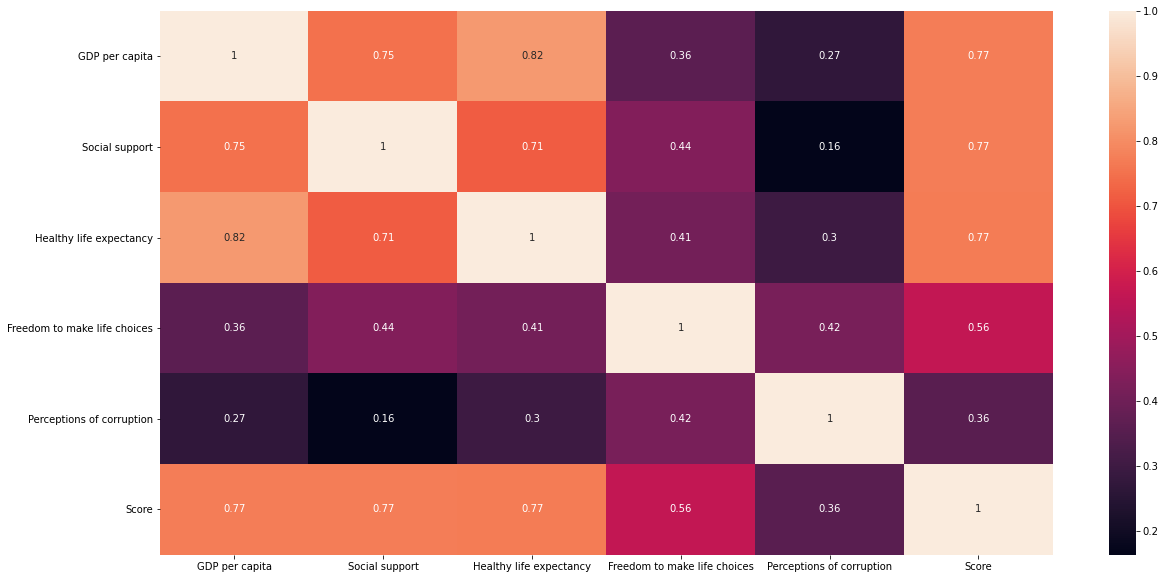

In [117]:
fig = plt.subplots(figsize = (20,10))
sns.heatmap(train.corr(), annot = True)

In [118]:
linear_regression = LinearRegression()
linear_regression.fit(x,y)

LinearRegression()

In [119]:
y_pred = linear_regression.predict(x)
y_pred
acc = linear_regression.score(x_test, y_test)
acc_percentage = acc*100
acc_percentage

86.05490343316148